In [ ]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=a526a5d61510580ac952ab8f08302efa620df40ea660a418a261e065e5c8e0be
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [ ]:
import pyspark
from pyspark.sql.session import SparkSession
from pyspark import SparkContext,SparkConf
import random

In [ ]:
sc = SparkContext('local')

In [ ]:
spark = SparkSession(sc)

In [ ]:
df = spark.read.csv("Movies.csv",sep=";",inferSchema = True,header = True)

In [ ]:
df.show()

+----+------+--------------------+-------+--------------------+-------------------+--------------------+----------+------+--------------------+
|Year|Length|               Title|  Genre|               Actor|            Actress|            Director|Popularity|Awards|         *Image,,,,,|
+----+------+--------------------+-------+--------------------+-------------------+--------------------+----------+------+--------------------+
| INT|   INT|              STRING|    CAT|                 CAT|                CAT|                 CAT|       INT|  BOOL|         STRING,,,,,|
|1990|   111|Tie Me Up! Tie Me...| Comedy|   Banderas, Antonio|    Abril, Victoria|    Almod�var, Pedro|        68|    No|  NicholasCage.png,,|
|1991|   113|          High Heels| Comedy|        Bos�, Miguel|    Abril, Victoria|    Almod�var, Pedro|        68|    No|  NicholasCage.png,,|
|1983|   104|      Dead Zone, The| Horror| Walken, Christopher|      Adams, Brooke|   Cronenberg, David|        79|    No|   NicholasCag

In [ ]:
df.printSchema()

root
 |-- Year: string (nullable = true)
 |-- Length: string (nullable = true)
 |-- Title: string (nullable = true)
 |-- Genre: string (nullable = true)
 |-- Actor: string (nullable = true)
 |-- Actress: string (nullable = true)
 |-- Director: string (nullable = true)
 |-- Popularity: string (nullable = true)
 |-- Awards: string (nullable = true)
 |-- *Image,,,,,: string (nullable = true)



In [ ]:
#Q1
from pyspark.sql.functions import col

In [ ]:
action_award_movies = (
    df.select("Title", "Year", "Director").filter((col("Genre") == "Action") & (col("Awards") == "Yes"))
)
action_award_movies.show()

+-----+----+--------+
|Title|Year|Director|
+-----+----+--------+
+-----+----+--------+



In [ ]:
#Q2
from pyspark.sql.functions import split, explode, col

award_actors = df.filter(col("Awards") == "Yes").select(explode(split(col("Actor"), ", ")).alias("Actor"))
df.select(col("Title"),col("Director")).show()

# join award_actors with movies_df to get movies for each actor
movies_award_actors = df.select("Title", "Director", "Actor").distinct()
# print movies and director for each actor
movies_award_actors.groupBy("Actor").agg({"Title": "collect_list", "Director": "max"}).orderBy("Actor").show(truncate=False)


+--------------------+--------------------+
|               Title|            Director|
+--------------------+--------------------+
|              STRING|                 CAT|
|Tie Me Up! Tie Me...|    Almod�var, Pedro|
|          High Heels|    Almod�var, Pedro|
|      Dead Zone, The|   Cronenberg, David|
|                Cuba|     Lester, Richard|
|      Days of Heaven|    Malick, Terrence|
|           Octopussy|          Glen, John|
|        Target Eagle|Loma, Jos� Antoni...|
|American Angels: ...|  Sebastian, Beverly|
|              Subway|         Besson, Luc|
|     Camille Claudel|      Nuytten, Bruno|
| Fanny and Alexander|     Bergman, Ingmar|
|Tragedy of a Ridi...|Bertolucci, Bernardo|
|     A Man & a Woman|     Lelouch, Claude|
|A Man & a Woman: ...|     Lelouch, Claude|
|Un Hombre y una M...|     Lelouch, Claude|
| Official Story, The|        Puenzo, Luiz|
|Lindbergh Kidnapp...|         Kulik, Buzz|
|           Blackmail|   Hitchcock, Alfred|
|      Donovan's Reef|          

In [ ]:
#Q3
from pyspark.sql.functions import desc

non_award_movies_df = df.filter(df.Awards == "No")
# sort by popularity in descending order and select top 10
top_10_df = non_award_movies_df.sort(desc("Popularity")).limit(10)
top_10_df.select("Title", "Popularity").show()


+--------------------+----------+
|               Title|Popularity|
+--------------------+----------+
|        Tango & Cash|         9|
|              Plenty|         9|
|Masque of the Red...|         9|
|           Lionheart|         9|
|        Judge Priest|         9|
|           Dead-Bang|         9|
|       Basil The Rat|         9|
|               Glitz|         9|
|            Morituri|         9|
|Naked Gun: From t...|         9|
+--------------------+----------+



In [ ]:
#Q4
from pyspark.sql.functions import col
least_popular_movies = df.filter(col("Year") < 1980).orderBy("Popularity").limit(10)
least_popular_movies.show()

+----+------+------------------+--------+--------------------+------------------+-------------------+----------+------+--------------------+
|Year|Length|             Title|   Genre|               Actor|           Actress|           Director|Popularity|Awards|         *Image,,,,,|
+----+------+------------------+--------+--------------------+------------------+-------------------+----------+------+--------------------+
|1953|    61|   White Lightning|    null|   Clements, Stanley|  Blondell, Gloria|     Bernds, Edward|      null|    No|  NicholasCage.png,,|
|1923|    57|      Desert Rider| Western|         Hoxie, Jack|    Nelson, Evelyn|Bradbury, Robert N.|      null|    No|  NicholasCage.png,,|
|1927|    62|    Drop Kick, The|   Drama|Barthelmess, Richard|     Kent, Barbara|      Webb, Millard|      null|    No|   NicholasCage.png,|
|1954|    30| Bank on the Stars|   Drama|          Paar, Jack|              null|       Allen, Craig|      null|    No| NicholasCage.png,,,|
|1976|   128|

In [ ]:
#Q5
from pyspark.sql.functions import col

sorted_movies = df.filter(col("year") < 1990).orderBy("Title")
sorted_movies.show(10)

+----+------+--------------------+---------------+--------------------+------------------+--------------------+----------+------+-------------------+
|Year|Length|               Title|          Genre|               Actor|           Actress|            Director|Popularity|Awards|        *Image,,,,,|
+----+------+--------------------+---------------+--------------------+------------------+--------------------+----------+------+-------------------+
|1968|   139|2001: A Space Ody...|Science Fiction|        Dullea, Keir|  Tyzack, Margaret|    Kubrick, Stanley|        83|    No| NicholasCage.png,,|
|1982|    92|             48 Hrs.|         Action|         Nolte, Nick|  O'Toole, Annette|        Hill, Walter|        67|    No| NicholasCage.png,,|
|1963|   138|               8 1/2|          Drama|Mastroianni, Marc...|Cardinale, Claudia|   Fellini, Federico|        80|   Yes| NicholasCage.png,,|
|1966|    95|A Big Hand for th...|         Comedy|        Fonda, Henry|  Woodward, Joanne|       Coo

In [ ]:
#Q6
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("WineDataset").getOrCreate()
wine_df = spark.read.csv("wine_dataset.csv", header=True, inferSchema=True)

In [ ]:
wine_df.describe().show()

+-------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+--------------------+------------------+-----------------+-------------------+------------------+-----------------+
|summary|           Alcohol|        Malic_Acid|               Ash|     Ash_Alcanity|         Magnesium|     Total_Phenols|        Flavanoids|Nonflavanoid_Phenols|   Proanthocyanins|  Color_Intensity|                Hue|             OD280|          Proline|
+-------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+--------------------+------------------+-----------------+-------------------+------------------+-----------------+
|  count|               178|               178|               178|              178|               178|               178|               178|                 178|               178|              178|                178|          

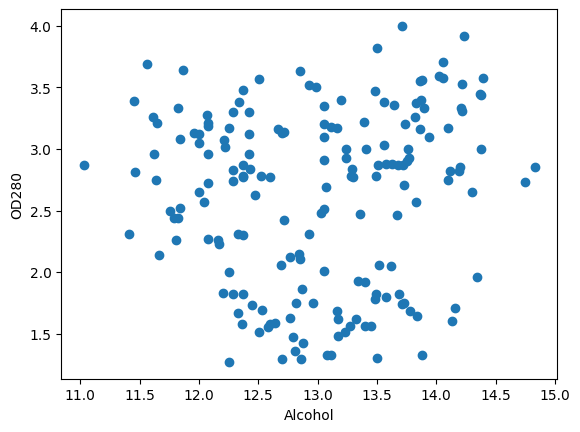

In [ ]:
import pyspark.sql.functions as F #visualize
import matplotlib.pyplot as plt
plt.scatter(
    wine_df.select("Alcohol").rdd.map(lambda x: x[0]).collect(),
    wine_df.select("OD280").rdd.map(lambda x: x[0]).collect()
)
plt.xlabel("Alcohol")
plt.ylabel("OD280")
plt.show()

In [ ]:
# remove outliers
wine_df = wine_df.filter((wine_df["Alcohol"] >= 9) & (wine_df["OD280"] <= 15))

In [ ]:
#correlation
wine_df.corr("Alcohol", "OD280")

0.07234318740052098

In [ ]:
#Q7
from pyspark.ml.clustering import KMeans, BisectingKMeans
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.sql.functions import col

wine_df = spark.read.csv('wine_dataset.csv', header=True, inferSchema=True)
# Create a feature vector
assembler = VectorAssembler(inputCols=wine_df.columns, outputCol='features')
wine_df = assembler.transform(wine_df)

# Scale the features
scaler = StandardScaler(inputCol='features', outputCol='scaled_features', withStd=True, withMean=True)
scaler_model = scaler.fit(wine_df)
wine_df = scaler_model.transform(wine_df).select('scaled_features')
wine_df.cache()

DataFrame[scaled_features: vector]